In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data/test/benign/1269.jpg
/kaggle/input/data/test/benign/623.jpg
/kaggle/input/data/test/benign/820.jpg
/kaggle/input/data/test/benign/1354.jpg
/kaggle/input/data/test/benign/45.jpg
/kaggle/input/data/test/benign/369.jpg
/kaggle/input/data/test/benign/1711.jpg
/kaggle/input/data/test/benign/1173.jpg
/kaggle/input/data/test/benign/1488.jpg
/kaggle/input/data/test/benign/436.jpg
/kaggle/input/data/test/benign/1409.jpg
/kaggle/input/data/test/benign/71.jpg
/kaggle/input/data/test/benign/1055.jpg
/kaggle/input/data/test/benign/215.jpg
/kaggle/input/data/test/benign/185.jpg
/kaggle/input/data/test/benign/1025.jpg
/kaggle/input/data/test/benign/1343.jpg
/kaggle/input/data/test/benign/1579.jpg
/kaggle/input/data/test/benign/717.jpg
/kaggle/input/data/test/benign/1473.jpg
/kaggle/input/data/test/benign/253.jpg
/kaggle/input/data/test/benign/1166.jpg
/kaggle/input/data/test/benign/626.jpg
/kaggle/input/data/test/benign/1443.jpg
/kaggle/input/data/test/benign/5.jpg
/kaggle/input/da

In [7]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

os.listdir("/kaggle/input/")

os.listdir("/kaggle/input/train")

ben_dir = "/kaggle/input/train/benign"
malig_dir = "/kaggle/input/train/malignant"

train_dir = "/kaggle/input/train"
test_dir = "/kaggle/input/test"

print("Number of images in benign folder:",len(os.listdir("/kaggle/input/train/benign")))
print("Number of images in malignant folder:",len(os.listdir("/kaggle/input/train/malignant")))

Number of images in benign folder: 1440
Number of images in malignant folder: 1197


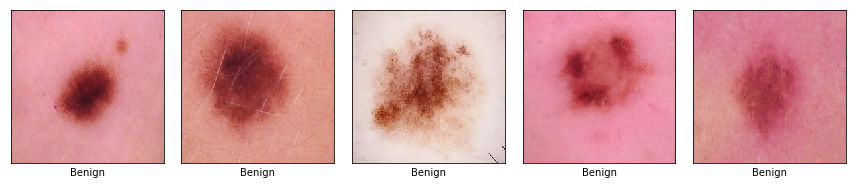

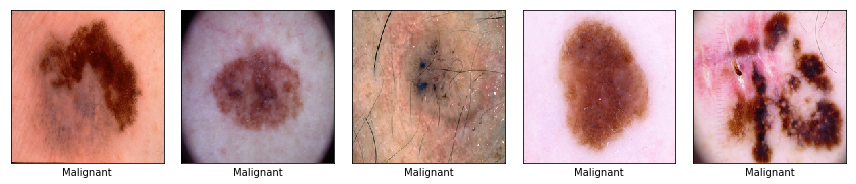

In [8]:
import random
import warnings
warnings.filterwarnings("ignore")
from tensorflow.keras.preprocessing.image import load_img
plt.figure(figsize=(12,7))
ben = random.sample(os.listdir(ben_dir),5)
malig = random.sample(os.listdir(malig_dir),5)

for i,img in enumerate(ben):
    path = os.path.join(ben_dir,img)
    img = load_img(path, target_size=(150,150))
    plt.subplot(1,5,i+1)
    plt.imshow(img)
    plt.xlabel("Benign")
    plt.xticks([])
    plt.yticks([])
plt.tight_layout();

plt.figure(figsize=(12,7))
for i,img in enumerate(malig):
    path = os.path.join(malig_dir,img)
    img = load_img(path, target_size=(150,150))
    plt.subplot(1,5,i+1)
    plt.imshow(img)
    plt.xlabel("Malignant")
    plt.xticks([])
    plt.yticks([])
plt.tight_layout();

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale =(1./255),rotation_range=0.2,
    width_shift_range=0.2,
    shear_range=0.3,
    zoom_range=0.3,
    fill_mode='nearest',
    horizontal_flip= True)

val_datagen = ImageDataGenerator(rescale =(1./255))

train_data = train_datagen.flow_from_directory(directory = train_dir, 
                                               target_size =(224,224),
                                               class_mode = "categorical",
                                               batch_size =32)
test_data = val_datagen.flow_from_directory(directory = test_dir, 
                                               target_size =(224,224),
                                               class_mode = "categorical",
                                               batch_size =32)


Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


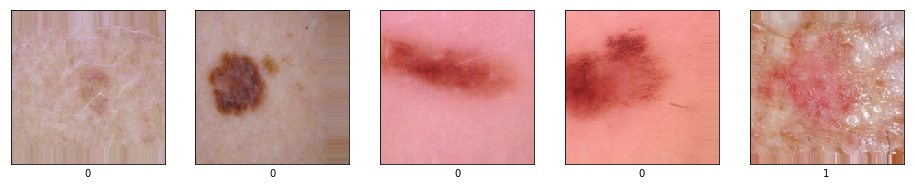

In [10]:
from tensorflow.keras.preprocessing import image
sample_x, sample_y = next(train_data)
plt.figure(figsize=(16,9))
for i in range(5):
    plt.subplot(1,5,i+1)
    img = image.img_to_array(sample_x[i])
    plt.imshow(img)
    plt.xlabel(np.argmax(sample_y[i]))
    plt.xticks([])
    plt.yticks([])
plt.show()


In [11]:
from tensorflow.keras.applications import VGG19

In [12]:
dense = VGG19(weights = "imagenet", include_top = False, input_shape=(224,224,3))

Instructions for updating:
Colocations handled automatically by placer.
80142336/80134624 [==============================] - 1s 0us/step


In [13]:
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D,GlobalAveragePooling2D, Flatten, Dropout, BatchNormalization

model = Sequential()
model.add(dense)
model.add(MaxPooling2D())
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(512,activation= "relu"))
model.add(Dropout(0.5))
model.add(Dense(2, activation = "sigmoid"))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [14]:
#comment cell
VGG16_model = Sequential()

pretrained_model= tf.keras.applications.VGG16(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',classes=2,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

VGG16_model.add(pretrained_model)

VGG16_model.add(BatchNormalization())
VGG16_model.add(Dropout(0.3))

VGG16_model.add(Flatten())
VGG16_model.add(Dense(512, activation='relu'))
VGG16_model.add(Dropout(0.5))
VGG16_model.add(Dense(2, activation='softmax'))

58892288/58889256 [==============================] - 1s 0us/step


In [15]:
#comment cell
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D,GlobalAveragePooling2D, Flatten, Dropout, BatchNormalization

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 7, 7, 512)         20024384  
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 3, 3, 512)         0         
_________________________________________________________________
batch_normalization_v1 (Batc (None, 3, 3, 512)         2048      
_________________________________________________________________
dropout (Dropout)            (None, 3, 3, 512)         0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               2359808   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
__________

In [17]:
plot_model(model,
    to_file='VGG19.png',
    show_shapes=False,
    show_layer_names=True)

In [19]:
!pip install tensorflow-addons==0.16.1

  Could not find a version that satisfies the requirement tensorflow-addons==0.16.1 (from versions: 0.5.0, 0.5.1, 0.5.2, 0.6.0, 0.7.0, 0.7.1, 0.8.1, 0.8.2, 0.8.3, 0.9.0, 0.9.1, 0.10.0, 0.11.0, 0.11.1, 0.11.2, 0.12.0, 0.12.1, 0.13.0, 0.14.0)
No matching distribution found for tensorflow-addons==0.16.1
You are using pip version 19.0.3, however version 21.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [25]:
from tensorflow.keras import metrics
metrics = ['accuracy',
           metrics.Precision(name='precision'),
           metrics.Recall(name='recall'),
           tf.keras.metrics.TruePositives(name= 'tp'),
           tf.keras.metrics.TrueNegatives(name = 'tn'),
           tf.keras.metrics.FalseNegatives(name = 'fn'),
           tf.keras.metrics.FalsePositives(name = 'fp')
          ]

In [26]:
lr=0.0001
model.compile(optimizer = Adam(lr = 0.0001), loss = "categorical_crossentropy", metrics = metrics)

In [27]:
patience = 1
stop_patience = 3
factor = 0.5
#    tf.keras.callbacks.EarlyStopping(patience=stop_patience, monitor='val_loss', verbose=1),
callbacks = [
    tf.keras.callbacks.ModelCheckpoint("vgg19.h5", save_best_only=True, verbose = 0),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=factor, patience=patience, verbose=1)
]

In [28]:
history = model.fit(train_data, validation_data = test_data, epochs = 30, 
                    verbose = 1, callbacks = callbacks )

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
83/83 [==============================] - 58s 701ms/step - loss: 0.4765 - acc: 0.7562 - precision: 0.7207 - recall: 0.7683 - tp: 2026.0000 - tn: 1852.0000 - fn: 611.0000 - fp: 785.0000 - val_loss: 6.5808 - val_acc: 0.4545 - val_precision: 0.4545 - val_recall: 0.4545 - val_tp: 300.0000 - val_tn: 300.0000 - val_fn: 360.0000 - val_fp: 360.0000
Epoch 2/30
83/83 [==============================] - 39s 470ms/step - loss: 0.3866 - acc: 0.8339 - precision: 0.7755 - recall: 0.8866 - tp: 2338.0000 - tn: 1960.0000 - fn: 299.0000 - fp: 677.0000 - val_loss: 1.1305 - val_acc: 0.7000 - val_precision: 0.6900 - val_recall: 0.5833 - val_tp: 385.0000 - val_tn: 487.0000 - val_fn: 275.0000 - val_fp: 173.0000
Epoch 3/30
83/83 [==============================] - 40s 479ms/step - loss: 0.3609 - acc: 0.8347 - precision: 0.7710 - recall: 0.8999 - tp: 2373.0000 - tn: 1932.0000 - fn: 264.0000 - fp: 705.0000 - val_loss: 0.3778 - val_acc: 0.8333 - val_precisio

In [29]:
model.save("vgg19.h5")
model.evaluate(test_data)

21/21 [==============================] - 3s 124ms/step - loss: 0.3027 - acc: 0.8682 - precision: 0.8047 - recall: 0.9242 - tp: 610.0000 - tn: 512.0000 - fn: 50.0000 - fp: 148.0000


[0.3027419305983044,
 0.8681818,
 0.80474937,
 0.92424244,
 610.0,
 512.0,
 50.0,
 148.0]

In [30]:
import itertools
y_pred = model.predict(test_data)

In [31]:
#y_pred = np.argmax(y_pred, axis=1)
y_pred = list(itertools.chain.from_iterable(y_pred))

pred = []
def prediction(label):
    for i in label:
        if i > 0.5:
            pred.append(1)
        else:
            pred.append(0)
    return pred
       
predict = prediction(y_pred) #predict = 
print(predict)

[1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 

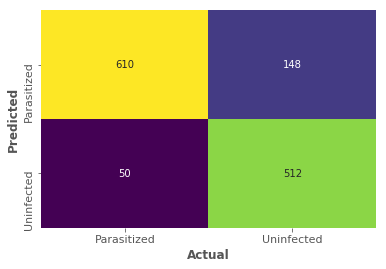

In [34]:
import seaborn as sns
cm_data = [[history.history['val_tp'][-1], history.history['val_fp'][-1]], [history.history['val_fn'][-1], history.history['val_tn'][-1]]]
sns.heatmap(cm_data, annot=True, cmap = 'viridis',cbar = False,fmt = 'g')
plt.xticks([0.5,1.5],["Parasitized","Uninfected"],fontsize=11)
plt.yticks([0.5,1.5],["Parasitized","Uninfected"],fontsize=11)
plt.xlabel("Actual",fontsize=12, fontweight="bold")
plt.ylabel("Predicted",fontsize=12, fontweight="bold")
plt.show()

In [35]:
TP = history.history['val_tp'][-1]
print("TP =", TP)
FP = history.history['val_fp'][-1]
print("FP =", FP)
TN = history.history['val_tn'][-1]
print("TN =", TN)
FN = history.history['val_fn'][-1]
print("FN =", FN)

TP = 610.0
FP = 148.0
TN = 512.0
FN = 50.0


In [36]:
FPR= (FP/(FP+TN))
TPR= (TP/(TP+FN))
print("FPR=", FPR)
print("TPR=", TPR)

FPR= 0.22424242
TPR= 0.92424244


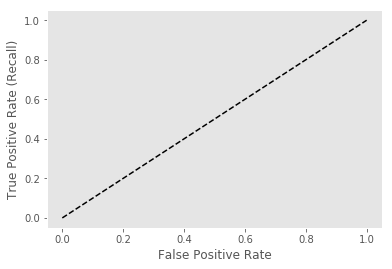

In [37]:
from sklearn.metrics import roc_curve
def plot_roc_curve (FPR, TPR, label = None):
    plt.plot(FPR, TPR, linewidth = 2, label = label)
    plt.plot([0,1], [0,1], 'k--') # Dashed diagonal
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.grid()
    
plot_roc_curve(FPR, TPR)
plt.show()
